## ENSF 593 Final Exam 

jupyter cloud (if everything breaks) https://ucalgary.syzygy.ca




## 1. Functions
Write two functions, one that takes a number as a string and returns the sum of the digits; the second takes a number as a string and returns the product of the digits.

Using these two functions, write a program that asks the user for a number, checks that it contains only digits and prints the sum and product of the digits.

In [1]:
def display_sum_digits(response):
    if response.isdigit():
        print( sum(int(digit) for digit in str(response)))
    
def display_product_digits(response):
    if response.isdigit():
        product = 1
        for digit in response:
            product *= int(digit)
        print( product )
    
    

# while True:
response = input("Input a number or 'quit'.")
display_sum_digits(response)
display_product_digits(response)

    # if response == "quit":
        # break
    
    
    

In [2]:
import numpy as np

## 2. Random
The game yahtzee uses 5 dice. The goal is to roll the 5 dice and report scores in various categories. One category called 'yahtzee' worth 50 points is achieved when all 5 dice show the same number.

Write a program that simulates 1000 attempts to get yahtzee, each attempt rolling five dice until all five have the same number. The program records the number of rolls needed in each attempt and print the average number of rolls after 1000 attempts.

Note that the inverse of this average number will be close to the probability of getting yahtzee in one roll, namely 
$$
p(yahtzee) = 6 * (1/6)^5 = 1/1296 \approx 0.08\%
$$

In [3]:
np.random.seed(453)

l = []
for i in range(1000):
    count = 0
    while True:
        count += 1
        dice = np.random.randint(1,7,size=5)
        
        if len(set(dice)) == 1:
            break
    l.append(count)
print(sum(l) / len(l))

    


1354.312


## 3. Files and strings
Write a function `extract_abstract()` that takes a filename, `9908043.txt` as parameter. The function checks if the file exists and if it exists, extracts the abstract and saves the text of the abstract in a new file with name `9908043_abstract.txt`.

The abstract is the text follwing the first occurence of `{\bf` until `}`.

Write a program that uses this function to extract the abstract in the file `9908043.txt`. In this file, the abstract starts with:
>Computers are physical systems: ...



In [4]:
import re 

1: '\\magnification=\\magstep1\n'
2: '\\hfuzz=6pt\n'
3: '\\baselineskip=15pt\n'
4: '\n'
5: '$ $\n'
6: '\n'
7: '\\vskip 1in\n'
8: '\n'
9: '\\centerline{\\bf Ultimate physical limits to computation}\n'
10: '\n'
11: '\\bigskip\n'
12: '\n'
13: '\\centerline{Seth Lloyd}\n'
14: '\n'
15: "\\centerline{d'Arbeloff Laboratory for Information Systems and Technology}\n"
16: '\n'
17: '\\centerline{MIT Department of Mechanical Engineering}\n'
18: '\n'
19: '\\centerline{MIT 3-160, Cambridge, Mass. 02139}\n'
20: '\n'
21: '\\centerline{slloyd@mit.edu}\n'
22: '\n'
23: '\\bigskip\n'
24: '\n'
25: '{\\bf Computers are physical systems: what they can and cannot do is \n'
26: 'dictated by the laws of physics$^{1-86}$.   In particular, the speed with\n'
27: 'which a physical device can process information is limited by\n'
28: 'its energy$^{11-26}$ and the amount of information that it can process\n'
29: 'is limited by the number of degrees of freedom it possesses$^{5-40}$.\n'
30: 'This paper explores the phys

In [6]:

def extract_abstract(fname):
    try:
        fout_name = fname.split('.')[0] + '_abstract.txt' #9908043_abstract.txt
        with open(fname, mode='r') as fin:
            abstract=''
            recording=False

            for line in fin:
                if line.startswith(r'{\bf') or recording:
                    abstract += line + ' '
                    recording=True
                if line.strip().endswith(r'}') and recording:
                    break

        print(abstract)

        with open(fout_name, mode='w') as fout:
            fout.write(abstract)
    except:
        print('something went wrong')


In [7]:
fname ='9908043.txt'
extract_abstract(fname)

{\bf Computers are physical systems: what they can and cannot do is 
 dictated by the laws of physics$^{1-86}$.   In particular, the speed with
 which a physical device can process information is limited by
 its energy$^{11-26}$ and the amount of information that it can process
 is limited by the number of degrees of freedom it possesses$^{5-40}$.
 This paper explores the physical limits of computation
 as determined by the speed of light $c$, the quantum scale $\hbar$
 and the gravitational constant $G$.  As an example, quantitative
 bounds are put to the computational power of an `ultimate laptop' 
 with a mass of one kilogram confined to a volume of one liter.} 
 


In [8]:
fname ='9908043.txt'
fname.split('.')[0] + '_abstract.txt'



'9908043_abstract.txt'

## 4. Objects
Create a class named Vehicle which has:
- a `liters_per_100km` data variable (a float, denoting fuel consumption) 
- and two class variables: style (that can be 'hatchback', 'SUV' or 'sedan' ), `fuel_capacity` which is an integer (tank size in liters).

Create two classes named Piccolo and Grande . These must be sub-classes of the Vehicle
class.
Implement a `get_range()` method in the parent class that uses the instance's `fuel_capacity` and `liters_per_100km` to calculate the range in kilometers (how many kilometers the vehicle can drive with full tank).
Use 40 and 50 for `fuel_capacity` and 'hatchback' and 'sedan' for `style` of Piccolo and Grande, respectively. The vehicle's consumption in liters-per-100km is an input that is given per instance, when first created.
For example, `print(Piccolo(5.0).get_range())` should print 800.0

In [9]:
class Vehicle:
   
    def __int__(self, style, fuel_cap, fuel_eff):
        self.style = style
        self.fuel_capacity = fuel_cap
        self.liters_per_100km = fuel_eff
        
    def get_range(self):
        return self.fuel_capacity / self.liters_per_100km  *100
        
class Piccolo(Vehicle):
   
    def __init__(self, fuel_eff):
        Vehicle.__int__(self, 'hatchback', 40, fuel_eff)
       

    
class Grande(Vehicle):

    def __init__(self, fuel_eff):
        Vehicle.__int__(self, 'sedan', 50, fuel_eff)
       
        
car = Piccolo(5)

print(car.liters_per_100km)
    
    
        



5


## 5. Scraping
Using `requests` and `BeautifulSoup` get the quote of the day from https://www.brainyquote.com/quote_of_the_day and print the quote and the name of the author.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re 

url = 'https://www.brainyquote.com/quote_of_the_day'
req = requests.get(url, verify=False).text
soup = BeautifulSoup(req, 'lxml')

snip = soup.find('div', 'qotd-h-short')

src = soup.prettify()

print(src)




/home/bryce/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<!DOCTYPE html>
<html data-ng-app="bqApp" data-ng-controller="ShowFavoritesCtrl" data-ng-init="initSFC()" lang="en">
 <head>
  <title>
   Quote of the Day - BrainyQuote
  </title>
  <meta content="all" name="robots"/>
  <meta charset="utf-8"/>
  <link href="//fonts.googleapis.com" rel="dns-prefetch"/>
  <link href="//fonts.gstatic.com" rel="dns-prefetch"/>
  <link href="//www.google-analytics.com" rel="dns-prefetch"/>
  <link href="//www.googletagservices.com" rel="dns-prefetch"/>
  <link href="//www.google.com" rel="dns-prefetch"/>
  <link href="//cdn.ampproject.org" rel="dns-prefetch"/>
  <link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
  <link href="//ad.doubleclick.net" rel="dns-prefetch"/>
  <link href="//cm.g.doubleclick.net" rel="dns-prefetch"/>
  <link href="//stats.g.doubleclick.net" rel="dns-prefetch"/>
  <link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//brainyquo

## 6. Data
Read the NHL games data (nhl_data.csv) input file with pandas and do the following:
1. Remove all rows with missing data.
2. Using pandas groupby, calculate the average(mean) number of goals (away_goals+home_goals) over all games in each stadium (venue).
3. Sort the groupedby dataframe by the average goals in descending order.
4. Print the top five rows of the sorted groupedby dataframe (only the venue name and the average goals)

In [11]:

df = pd.read_csv('nhl_data.csv')
df.head()

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2012030221,20122013,P,2013-05-16,3,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
1,2012030222,20122013,P,2013-05-19,3,6,2,5,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
2,2012030223,20122013,P,2013-05-21,6,3,2,1,away win REG,right,Madison Square Garden,/api/v1/venues/null,America/New_York,-4,EDT
3,2012030224,20122013,P,2013-05-23,6,3,3,4,home win OT,right,Madison Square Garden,/api/v1/venues/null,America/New_York,-4,EDT
4,2012030225,20122013,P,2013-05-25,3,6,1,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7441 entries, 0 to 7440
Data columns (total 15 columns):
game_id                   7441 non-null int64
season                    7441 non-null int64
type                      7441 non-null object
date_time                 7441 non-null object
away_team_id              7441 non-null int64
home_team_id              7441 non-null int64
away_goals                7441 non-null int64
home_goals                7441 non-null int64
outcome                   7441 non-null object
home_rink_side_start      7325 non-null object
venue                     7441 non-null object
venue_link                7441 non-null object
venue_time_zone_id        7441 non-null object
venue_time_zone_offset    7441 non-null int64
venue_time_zone_tz        7441 non-null object
dtypes: int64(7), object(8)
memory usage: 872.1+ KB


In [13]:
# dropping rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7325 entries, 0 to 7440
Data columns (total 15 columns):
game_id                   7325 non-null int64
season                    7325 non-null int64
type                      7325 non-null object
date_time                 7325 non-null object
away_team_id              7325 non-null int64
home_team_id              7325 non-null int64
away_goals                7325 non-null int64
home_goals                7325 non-null int64
outcome                   7325 non-null object
home_rink_side_start      7325 non-null object
venue                     7325 non-null object
venue_link                7325 non-null object
venue_time_zone_id        7325 non-null object
venue_time_zone_offset    7325 non-null int64
venue_time_zone_tz        7325 non-null object
dtypes: int64(7), object(8)
memory usage: 915.6+ KB


In [14]:
df['total_goals'] = df['away_goals'] + df['home_goals']
df_venue_mean = df.groupby(by='venue').mean()
df_venue_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Air Canada Centre to Yankee Stadium
Data columns (total 8 columns):
game_id                   63 non-null float64
season                    63 non-null float64
away_team_id              63 non-null float64
home_team_id              63 non-null float64
away_goals                63 non-null float64
home_goals                63 non-null float64
venue_time_zone_offset    63 non-null float64
total_goals               63 non-null float64
dtypes: float64(8)
memory usage: 4.4+ KB


In [15]:

df_venue_mean['total_goals'].sort_values(ascending=False).head(5)

venue
BMO Field                                                           9.0
Coors Field                                                         8.0
Bridgestone Arena                                                   7.0
Centre Bell                                                         7.0
Ericsson Globe                                                      7.0
Name: total_goals, dtype: float64

## 7. Visualization
Using the DataFrame prepared in Question 6, do the following:

- Generate a pie chart that summarizes the `outcome` column using all games.
- Make sure to annotate slices in the pie chart, and show percentage on each slice.
- Include a caption under the plot as well. (e.g. "Figure 1. Game outcomes")

Note: some example entries in the `outcome` column are:  
   home win OT: Home team wins - Over Time  
   home win REG: Home team wins - Regular  
   away win OT: Away team wins- Over Time  

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df['outcome'].value_counts()

home win REG    3108
away win REG    2476
home win OT      520
away win OT      478
home win SO      389
away win SO      354
Name: outcome, dtype: int64

Text(0.5, 0, 'Figure 1. Game outcomes')

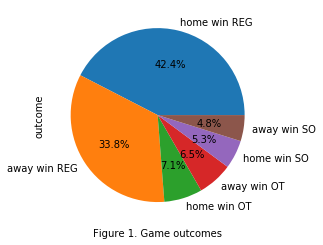

In [18]:
ax = df['outcome'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_xlabel('Figure 1. Game outcomes')
